# Day 9: Polynomial and Ridge Regression

Today, we will explore Polynomial Regression and Ridge Regression. These are two important extensions of the basic linear regression model that allow us to handle more complex data relationships and regularization in machine learning models.

## Topics Covered
- Polynomial Regreassion
- Ridge Regression (L2 Regularization)

## 1. Polynomial Regression

While linear regression models a straight-line relationship betwwen features and the target variable, polynomial regression models non-linear relationships. It does this by transforming the original features into polnomial features of a specified degree, which allows the model to fit curved patterns in the data.

### Key Points:
- Polynomial Features: 
    - The model adds polynomial terms like $ 𝑥^2,𝑥^3, \dots $ to the dataset to capture non-linear relationships.

- Still a Linear Model: 
    - Despite the polynomial terms, the regression is still considered "linear" because the model is linear in terms of the coefficients (weights).
- Degree of Polynomial: 
    - The degree of the polynomial determines the flexibility of the curve. A higher degree can capture more complex patterns, but it also increases the risk of overfitting.

### Formula for Polynomial Regression:

$ y= \beta_0 + \beta_1 x+ \beta_2  x^2+\dots+ \beta_n x^n$

Where:
- $ y: is Target variable 
- $ \beta_0 $ is intercept term, which is the value of $y$ when $x=0$
- $ \beta_1, \beta_2, \dots, \beta_n $: These are co-efficients and parameters of the polynomial regression model. They represent the weights that the model assigns to each corresponding power of the independent variable $x$. Each coefficient captures the influence of a different power of $ x$ on the dependent variable $y$.

###  Example: House price prediction model

In a house price prediction model, the relationship between house size and price might not be perfectly linear. Larger houses could increase in price at a non-linear rate (e.g., a large house might be disproportionately more expensive than a slightly smaller one). Polynomial regression allows the model to capture such a pattern.

When we are predicting house prices, and the relationship between square footage (feature $x$) and price ($y$) is not linear, a polynomial regression model might fit better than a simple linear regression model. A quadratic term ($\beta_2 x^2$ ) could capture situations where price increases at an increasing rate as square footage grows.

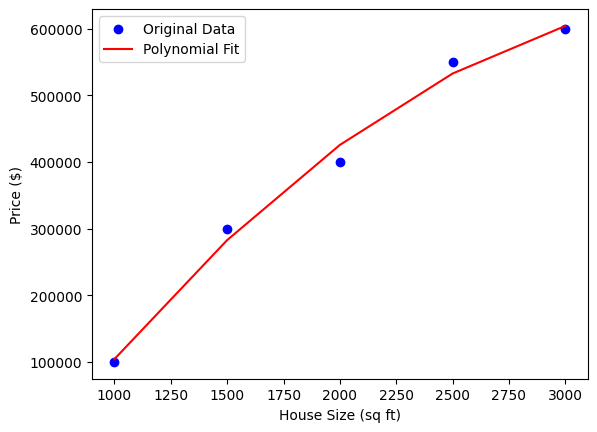

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)

y = np.array([100000, 300000, 400000, 550000, 600000])

# Transforming data to include polynomial features
poly = PolynomialFeatures(degree=2)  # degree 2 polynomial

X_poly = poly.fit_transform(X)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predicting prices
y_pred = model.predict(X_poly)

# Plotting the original data and the polynomial fit
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


### Pros:
- Can model non-linear relationships.
- Provides flexibility in fitting data that a simple linear model might miss.

### Cons:
- Susceptible to overfitting if the degree of the polynomial is too high.
- More complex and harder to interpret than simple linear regression.

## 2. Ridge Regression (L2 Regularization)

Ridge regression is a type of regularized linear regression. In standard linear regression, the model tries to minimize the sum of squared errors between the predicted and actual values. Ridge regression modifies this by adding a penalty for large coefficients (weights), which helps prevent overfitting when working with many features or when features are highly correlated.

### Formula for Ridge Regression:

$ Minimize  \left( \text{RSS} + \lambda \sum_{i=1}^{n} \beta_i^2 \right) $


Where:
- $RSS$ is the residual sum of squares (standard error term).
- $\lambda$ is the regularization parameter that controls the strength of the penalty. A higher $\lambda$ leads to more regularization (smaller coefficients).

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
y = np.array([200000, 300000, 400000, 500000, 600000])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.003265303132143936


### Benefits of Ridge Regression:


- Prevents Overfitting: 
    - The regularization term penalizes large coefficients, preventing the model from fitting noise in the training data.
- Works Well with Collinear Data: 
    - Helps when features are correlated with each other (multicollinearity).

### Use Case:


Ridge regression is particularly useful in scenarios where you have many features, and some of them are highly correlated. For example, in a marketing campaign effectiveness model, where spending on different marketing channels (TV, online ads, print media) might be correlated, Ridge regression can prevent overfitting.

### Pros:


- Reduces overfitting in models with many features.
- Helps manage multicollinearity (correlation between features).


### Cons:

- Not ideal for selecting the most important features (Lasso regression is better for this).
- Requires tuning of the regularization parameter ($\lambda$).

## Conclusion:

On Day 9, we have learned:

- How Polynomial Regression can be used to model non-linear relationships.
- How Ridge Regression applies regularization to linear models, preventing overfitting, and dealing with multicollinearity.

## What's Next:

Tomorrow, we'll dive deeper into Lasso Regression and ElasticNet Regression, two advanced techniques that enhance linear models by adding regularization. These techniques are particularly powerful when dealing with datasets that contain a large number of features, many of which may be irrelevant or highly correlated.

### Practical Insights:

- Feature Selection: 
    - How Lasso simplifies models by discarding irrelevant variables.
- Dealing with Multicollinearity: 
    - How ElasticNet helps overcome issues in datasets with correlated predictors.
- Regularization Tuning: 
    - Learn how to adjust regularization strength to avoid overfitting and achieve better generalization on unseen data.

By the end of tomorrow’s session, we will be equipped with powerful tools to manage complex datasets, improve model performance, and understand the trade-offs between feature selection and regularization. These concepts will lay a strong foundation for tackling more sophisticated machine learning challenges.